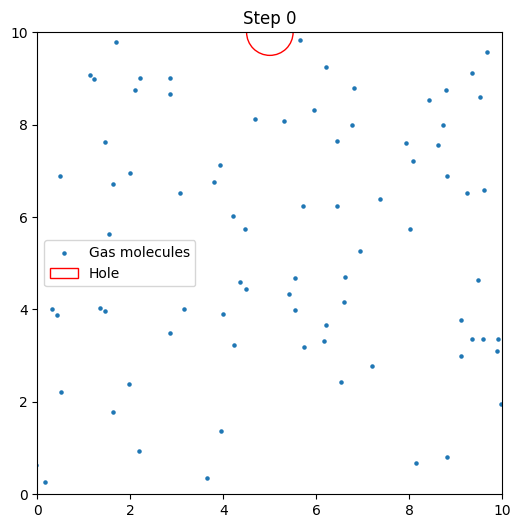

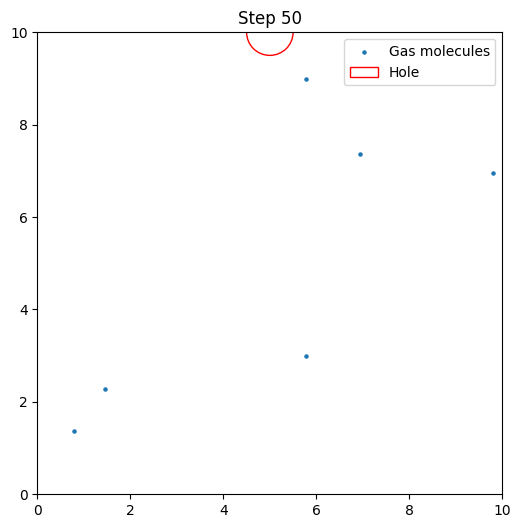

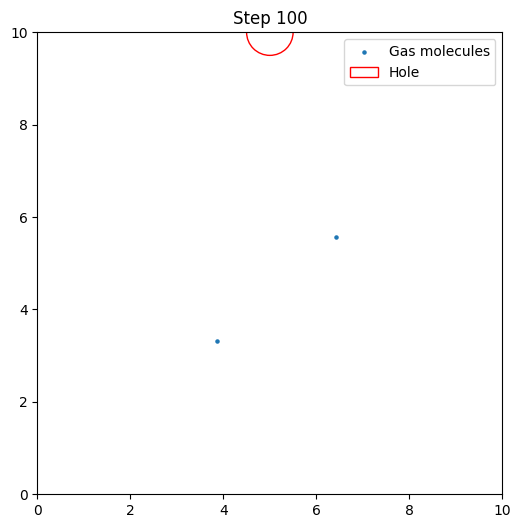

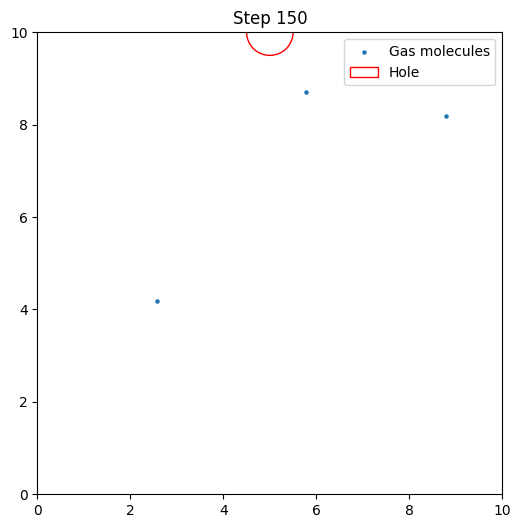

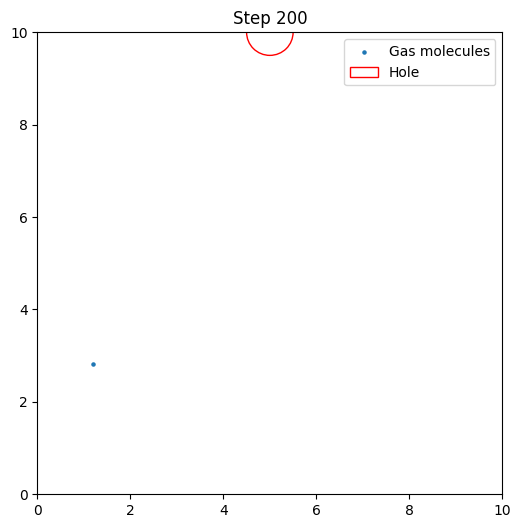

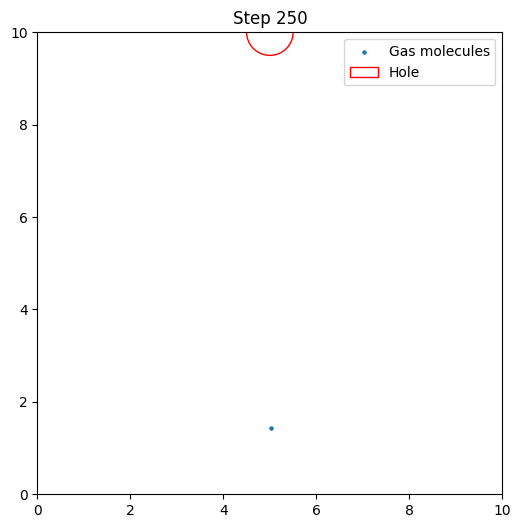

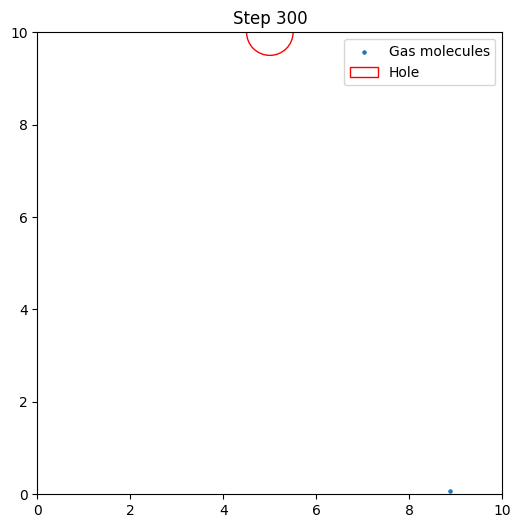

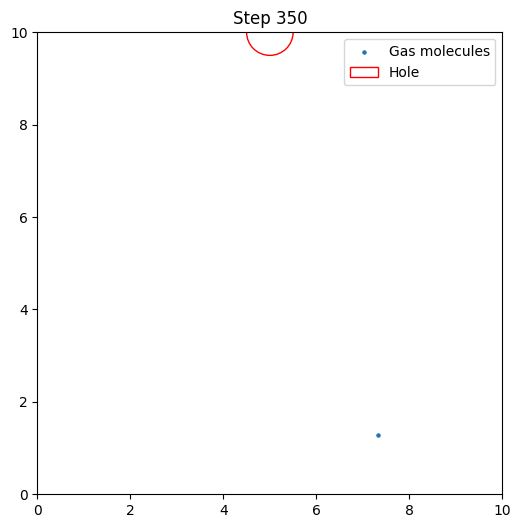

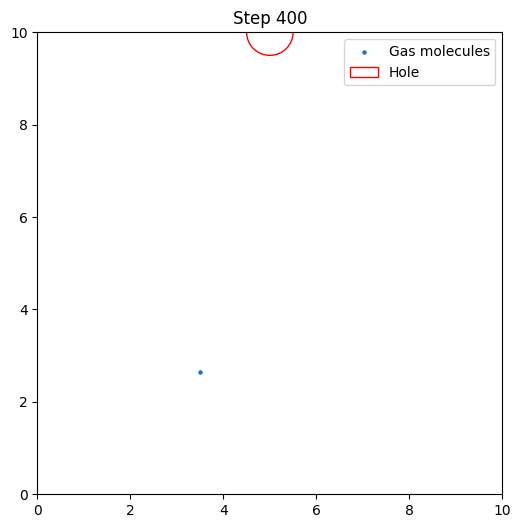

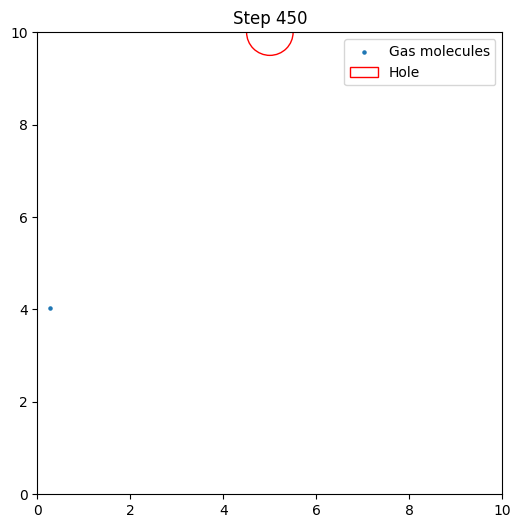

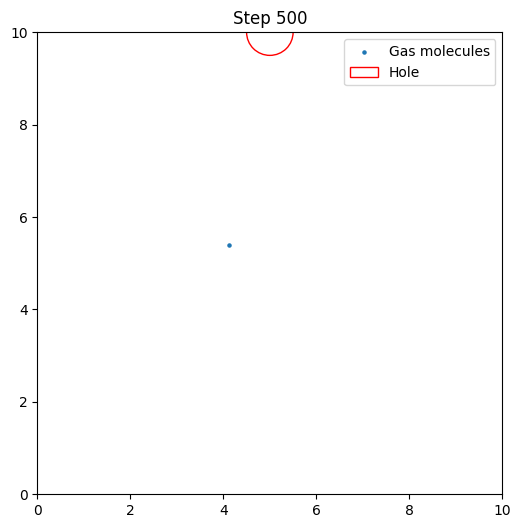

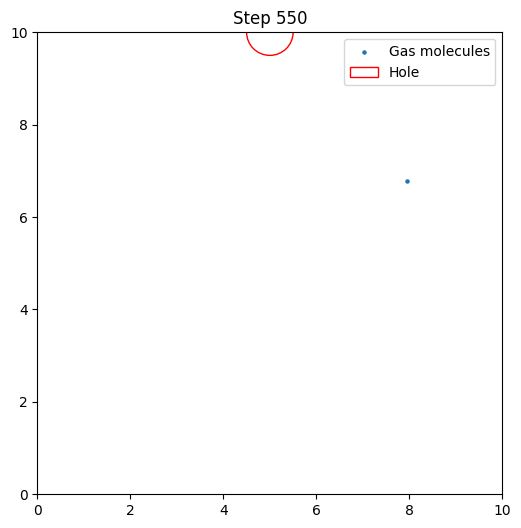

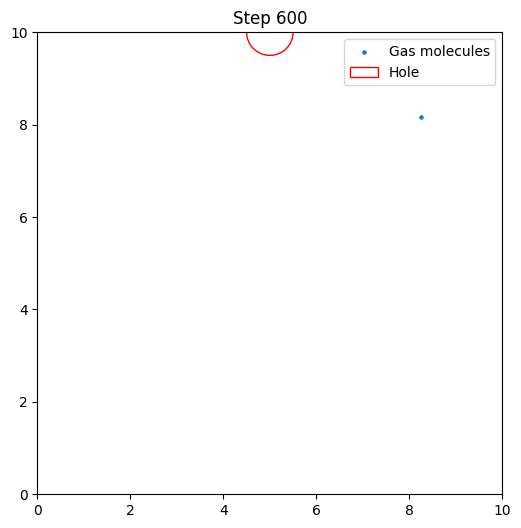

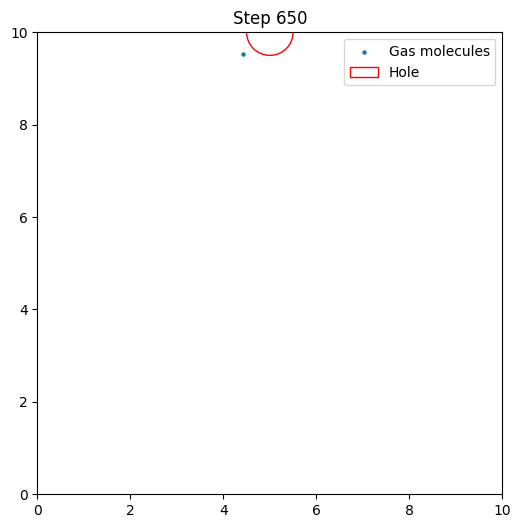

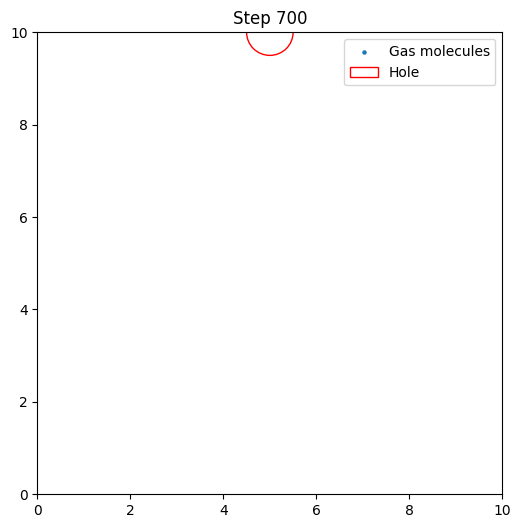

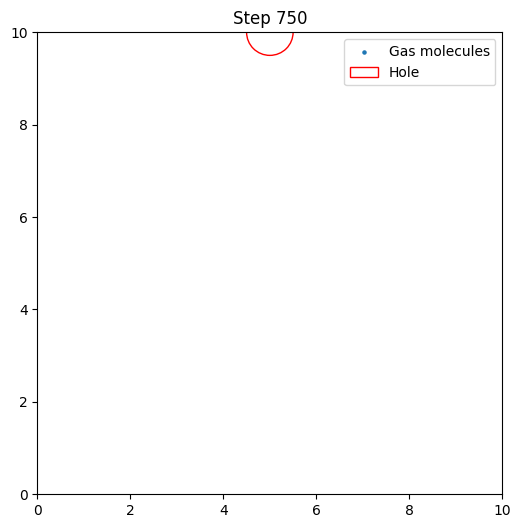

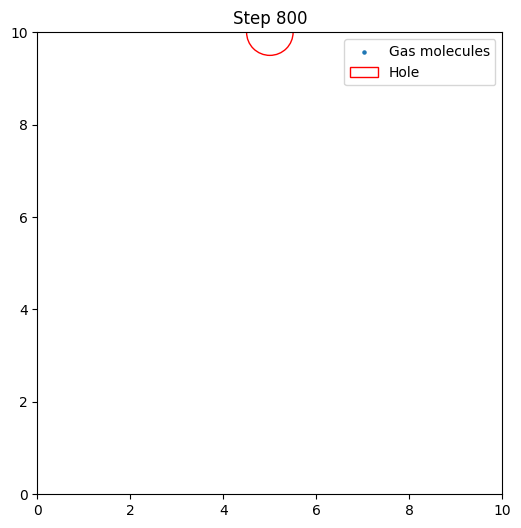

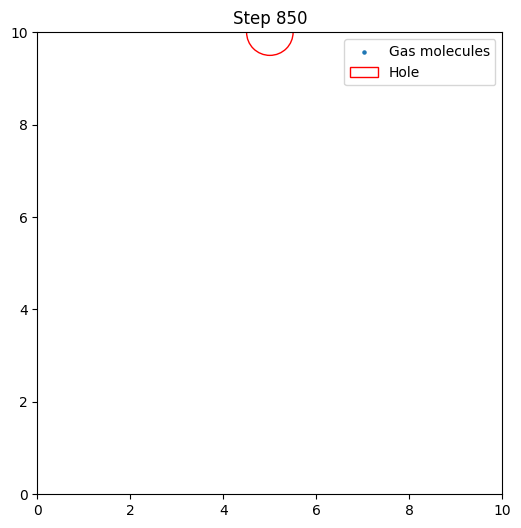

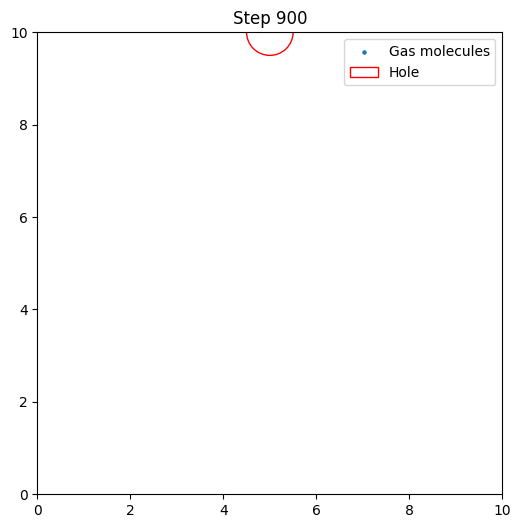

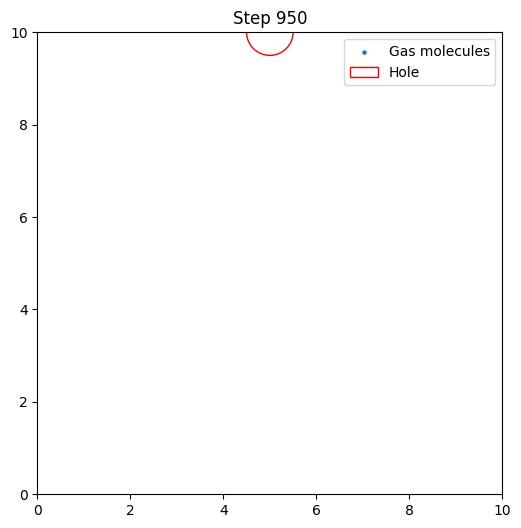

Total molecules effused: 8


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_particles = 500  # Number of gas molecules
container_size = 10  # Size of the container (square)
hole_radius = 0.5    # Radius of the hole
hole_position = [container_size / 2, container_size]  # Hole at the top center
temperature = 300    # Temperature in Kelvin
mass = 1e-26         # Mass of a molecule in kg
k_B = 1.38e-23       # Boltzmann constant

# Derived values
mean_speed = np.sqrt(3 * k_B * temperature / mass)  # Mean speed of particles

# Initialize positions and velocities
positions = np.random.rand(num_particles, 2) * container_size
angles = np.random.rand(num_particles) * 2 * np.pi
speeds = np.random.normal(mean_speed, mean_speed / 2, num_particles)
velocities = np.column_stack((speeds * np.cos(angles), speeds * np.sin(angles)))

# Simulation parameters
dt = 0.01  # Time step
time_steps = 1000

# Function to check if a molecule is in the hole
def in_hole(pos, hole_position, hole_radius):
    return np.linalg.norm(pos - np.array(hole_position)) < hole_radius

# Lists to track effused particles
effused_particles = []

# Simulation loop
for step in range(time_steps):
    positions += velocities * dt  # Update positions

    # Reflect molecules off the walls
    for i in range(num_particles):
        if positions[i, 0] < 0 or positions[i, 0] > container_size:  # Left/right walls
            velocities[i, 0] *= -1
        if positions[i, 1] < 0:  # Bottom wall
            velocities[i, 1] *= -1
        if in_hole(positions[i], hole_position, hole_radius):  # Effusion check
            effused_particles.append(positions[i])
            positions[i] = np.nan  # Mark as effused
            velocities[i] = np.nan  # Remove velocity

    # Remove effused particles
    mask = ~np.isnan(positions[:, 0])
    positions = positions[mask]
    velocities = velocities[mask]
    num_particles = len(positions)

    # Visualization
    if step % 50 == 0:
        plt.figure(figsize=(6, 6))
        plt.scatter(positions[:, 0], positions[:, 1], s=5, label="Gas molecules")
        circle = plt.Circle(hole_position, hole_radius, color="r", fill=False, label="Hole")
        plt.gca().add_artist(circle)
        plt.xlim(0, container_size)
        plt.ylim(0, container_size)
        plt.title(f"Step {step}")
        plt.legend()
        plt.show()

print(f"Total molecules effused: {len(effused_particles)}")